<div style="background-color: RGB(0,0,30); color: white">
<img src="https://uniandes.edu.co/sites/all/themes/donaciones/img/logo-andes.svg" width= 222 style="float:right;border:12px solid black">
<br><br><br><br>
<h1 style="text-align:center; color: white">Miniproyecto 2</h1><br>
<h3 style='text-align: right; color: white'> Departamento de Ingeniería Industrial &emsp;<br> Facultad de Ingeniería &emsp; <br>    Universidad de los Andes &emsp; <br>
</h3>
</div>

# Tópicos Avanzados en Estadística 2021-10

# Clustering by Dynamic Time Warping
### Integrantes: Nicolás Robayo, Alejandro Mantilla, Emilio González, Isabella Rodas

In [4]:
save.image()

In [ ]:
# DEPENDENCIES
# DO NOT RUN !!!!!!!
install.packages(c("dtw", "TSclust", "BBmisc", "tidyr"))
install.packages("dtwclust")
install.packages("tidyverse")
install.packages("pillar")

## Import data

In [141]:
#library("tidyverse")
library("pillar")
library(dtwclust)
library("dtwclust")


Attaching package: ‘pillar’


The following object is masked from ‘package:xtable’:

    align




In [142]:
data <- read.table("./Clustering-Customers-by-Energy-Demand/DemandaE.csv", header=TRUE, sep=",", row.names = "X")
data

id   hour day1    day2     day3     day4     day5    day6     day7    
1      1   1     12.019  10.830   12.430   14.340   11.600  13.100   11.690 
2      2   1     43.800  43.000   80.100   49.900   45.400  46.600   47.100 
3      3   1         NA      NA       NA       NA       NA      NA       NA 
4      4   1    121.797 165.627  157.092  215.705  173.397 171.485  163.671 
5      5   1    138.151 136.964  141.071  144.731  137.838 137.170  140.199 
6      6   1      7.000  10.000    7.000    7.000    8.000   8.000    8.000 
7      7   1     18.400   7.600   10.000    9.600    9.400   9.400   10.300 
8      8   1     10.840  10.670   10.861   11.260   23.661  16.380   15.590 
9      9   1     40.000  43.000   58.000   59.000   46.000  44.000   45.000 
10    10   1     10.000  20.000   20.000   16.000   10.000  12.000    8.000 
11    11   1     21.440  20.194   19.725   21.117   21.635  21.747   24.647 
12    12   1      2.870   3.210    3.000    3.620    3.170   3.050    3.100 
13    13   1      2.200   2.300   14.700    2.300    2.200   2.300   37.200 
14    14   1     28.355  33.095   38.085   36.850   35.255  31.500   41.250 
15    15   1     27.625  25.563   27.525   29.588   27.775  29.950   31.850 
16    16   1     18.000  18.000   17.000   17.000   16.000  16.000   16.000 
17    17   1         NA      NA       NA       NA       NA      NA       NA 
18    18   1     32.212  31.886  126.488  100.644   16.514  15.220    1.558 
19    19   1     14.800  17.900   16.400   17.100   17.700  16.700   18.400 
20    20   1     49.204  49.580   41.796   48.840   48.276  53.564   52.796 
21    21   1         NA      NA       NA       NA       NA      NA       NA 
22    22   1         NA      NA       NA       NA       NA      NA       NA 
23    23   1    124.800 126.300  121.400  153.200  163.599 139.000  141.701 
24    24   1         NA      NA       NA       NA       NA      NA       NA 
25    25   1     10.657  16.869   12.396   13.772    9.751   9.795   12.535 
26    26   1     15.554  23.542    9.542    9.554    7.554   9.542   73.536 
27    27   1      1.932   2.004   18.648   17.712    3.900   3.864    3.684 
28    28   1     74.983  73.335   81.936   89.239   81.606  83.822   84.349 
29    29   1     11.160  13.240   11.120   10.600    9.600  10.360    8.440 
30    30   1     54.225  66.598   62.290   52.726   63.064  51.167   62.173 
⋮     ⋮    ⋮    ⋮       ⋮        ⋮        ⋮        ⋮       ⋮        ⋮       
29803 1214 24    45.490   64.784   75.866   51.805  69.966   52.026   71.072
29804 1215 24    32.300   32.700   32.100   31.100  32.200   25.400   26.600
29805 1216 24        NA       NA       NA       NA      NA       NA       NA
29806 1217 24    49.500   49.800   49.000   49.800  58.600   51.700   52.000
29807 1218 24    10.100   11.500   11.200   11.100  12.900   13.400   11.500
29808 1219 24    30.700   25.390   25.170   30.380  30.160   26.450   26.920
29809 1220 24   415.454  134.726  474.047  398.887 177.029   37.978   34.543
29810 1221 24    11.000   13.000   13.000   12.000   9.000   12.000   14.000
29811 1222 24        NA       NA       NA       NA      NA       NA       NA
29812 1223 24    13.572   10.276   13.539   14.261   9.931    9.061    9.007
29813 1224 24    18.573   16.575   17.253   19.021  17.582   18.994   17.690
29814 1225 24    18.336   19.982   28.381   19.121  20.378   20.248   23.515
29815 1226 24    19.897   20.359   19.962   20.052  18.515   18.642   19.128
29816 1227 24    78.454   93.528   96.672   87.680  80.770   80.463   84.400
29817 1228 24    18.808   21.402   64.112   23.034  20.377   20.518   20.538
29818 1229 24     6.699    4.733    4.800    5.233   2.233    6.066    3.200
29819 1230 24     5.000    7.000    7.000    7.000   8.000    8.000    9.000
29820 1231 24        NA       NA       NA       NA      NA       NA       NA
29821 1232 24   173.520  182.940  169.500  155.340 147.540  141.480  161.940
29822 1233 24     7.392   25.872   24.348   44.688  14.928    6.240    7.296
29

### Transform Table

We transform the data frame such that the rows represent each individual customer and the columns represent each measurement taken, ordered in time.

In [143]:
customers <- unique(data[["id"]])
newdata <- data.frame(customers = customers)
for(d in 1:365){
    for(h in 1:24){
        newcol <- data.frame(data[data$hour == h, paste("day", d, sep = "")])
        col_name <- paste("day", d, "hour", h, sep = "_")
        colnames(newcol) <- col_name
        newdata <- cbind(newdata, newcol)
    }
}
newdata <- newdata[complete.cases(newdata),]
dim(newdata)
datevec <- seq(from = as.POSIXct("2019-01-01 00:00", tz="UTC"), to=as.POSIXct("2019-12-31 23:00", tz="UTC"), by="hour")
colnames(newdata) = c("Customers", paste(datevec))

weekendNames <- c(seq(from = as.POSIXct("2019-01-05 00:00:00", tz="UTC"),to=as.POSIXct("2019-12-31 23:59:00", tz="UTC"), by="week"),
                  seq(from = as.POSIXct("2019-01-06 00:00:00", tz="UTC"),to=as.POSIXct("2019-12-31 23:59:00", tz="UTC"), by="week"))

#newdata <- newdata[, -which(names(newdata) %in% c(sapply(1:24,function(x){format(weekendNames + (x-1) * 60 * 60, "%Y-%m-%d %H:%M:%S")})))]

newdata
#T <- dim(newdata)[2]

[1]  974 8761

Customers 2019-01-01 00:00:00 2019-01-01 01:00:00 2019-01-01 02:00:00
2     2         43.800              44.900              35.900            
4     4        121.797             110.700             101.302            
5     5        138.151             137.922             144.198            
6     6          7.000               6.000               6.000            
7     7         18.400              22.500              32.300            
8     8         10.840              10.750              11.090            
9     9         40.000              39.000              40.000            
10   10         10.000              18.000              16.000            
11   11         21.440              20.327              20.044            
12   12          2.870               2.960               3.540            
13   13          2.200               2.300               2.300            
14   14         28.355              31.145              27.085            
15   15         27.625              27.788              26.763            
16   16         18.000              16.000              19.000            
18   18         32.212              32.212              32.212            
19   19         14.800              15.500              16.400            
20   20         49.204              47.756              45.332            
23   23        124.800             124.500             127.000            
25   25         10.657              10.477              10.673            
26   26         15.554              12.548              11.560            
28   28         74.983              73.471              77.998            
29   29         11.160              10.560              11.200            
30   30         54.225              50.874              51.606            
33   33         41.570              41.470              41.460            
35   35         13.100              12.800              17.800            
36   36         25.425              25.225              25.050            
37   37          4.572               4.612               4.557            
38   38          9.438              13.036              12.512            
39   39          9.000               8.000              11.000            
40   40         10.767              10.705              10.517            
⋮    ⋮         ⋮                   ⋮                   ⋮                  
1209 1209      100.352             112.502             100.858            
1210 1210       12.219              17.813              12.156            
1211 1211       19.152              18.468              20.472            
1212 1212       37.195              37.032              39.620            
1213 1213       28.453              27.727              27.565            
1214 1214       48.893              47.199              48.454            
1215 1215       28.600              31.300              31.800            
1217 1217       50.900              47.000              50.800            
1218 1218       10.200              10.000              12.100            
1219 1219       28.450              28.700              29.390            
1220 1220      469.914             409.206             323.468            
1221 1221       12.000              11.000              11.000            
1223 1223        9.068               8.919              10.685            
1224 1224       15.268              17.268              16.735            
1225 1225       16.811              17.706              17.650            
1226 1226       19.494              19.576              19.520            
1227 1227       74.693              73.937              76.170            
1228 1228       18.792              18.767              27.915            
1229 1229        6.366               6.499               6.433            
1230 1230        5.000               7.000               5.000            
1232 1232      179.460             177.720             185.400            
1233 1233       36.732        

png 
  2

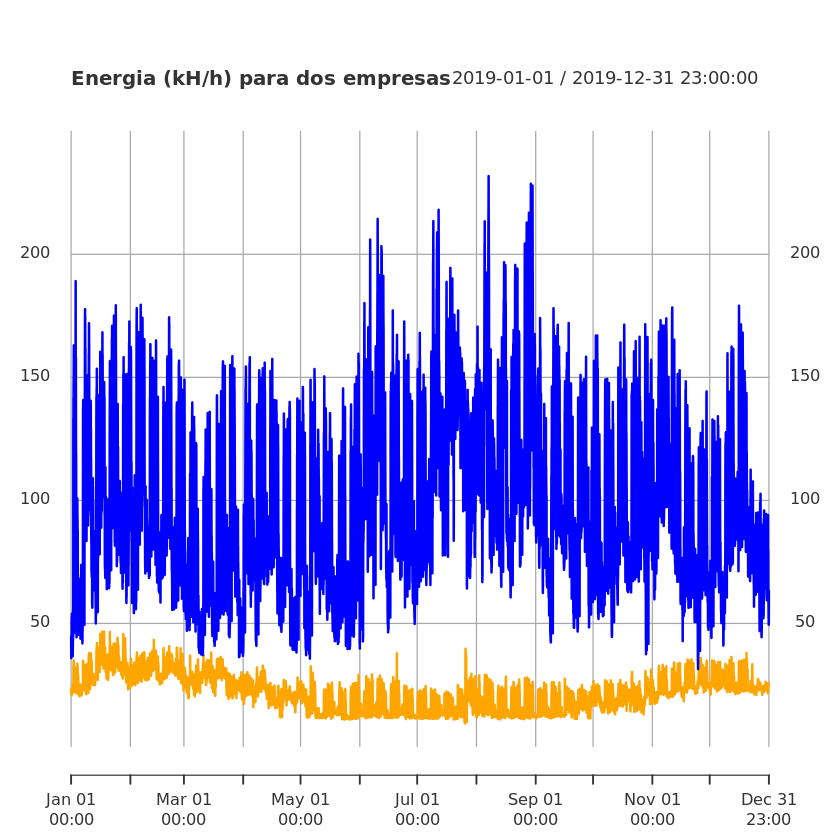

In [145]:
#library(xts)
my_ts <- xts(t(newdata[c("2","64"), -1]), order.by = datevec)

pdf("2_empresas.pdf")
print(plot.xts(x = my_ts, col = c("blue", "orange"), ylim = c(0, 250), main = "Energia (kH/h) para dos empresas"))
dev.off()
print(plot.xts(x = my_ts, col = c("blue", "orange"), ylim = c(0, 250), main = "Energia (kH/h) para dos empresas"))

### Group Columns by mean

In [146]:
# por 24 horas
horvec <- seq(from = as.POSIXct("2019-01-01 00:00", tz="UTC"), to=as.POSIXct("2019-01-01 23:00", tz="UTC"), by="hour")
daysofyear <- seq(from = as.POSIXct("2019-01-01 00:00", tz="UTC"), to=as.POSIXct("2019-12-31 00:00", tz="UTC"), by="days")
daysofyear <- daysofyear[! daysofyear %in% weekendNames]
df_1 <- as.data.frame(lapply(1:24, function(x){ rowMeans(newdata[, format(daysofyear + (x-1) * 60 * 60, "%Y-%m-%d %H:%M:%S")]) }))
df_1 <- cbind(newdata$Customer, df_1)
colnames(df_1) = c("Customers", paste(horvec))
df_1

Customers 2019-01-01 00:00:00 2019-01-01 01:00:00 2019-01-01 02:00:00
2     2          81.307663           81.585824           82.623372        
4     4         181.549261          169.284360          235.167655        
5     5         140.414073          142.297061          173.487249        
6     6           8.093755            7.680383            8.859923        
7     7          12.935249           21.301533           28.789655        
8     8          19.764088           19.998977           21.804571        
9     9          45.980843           49.475096           50.747126        
10   10           6.842912            8.536398            9.609195        
11   11          22.091054           23.046065           23.671958        
12   12           3.787326            3.688839            4.993755        
13   13           8.853257            8.825670           10.250958        
14   14          44.538280           42.612065           42.563337        
15   15          22.661943           22.467540           22.408046        
16   16          20.881226           22.417625           25.923372        
18   18          33.416958           33.912023           33.684996        
19   19          75.941762           77.583908           58.132950        
20   20          39.854050           48.695138           69.273299        
23   23         133.344084          135.390372          133.100487        
25   25           9.885881           10.447165           19.727540        
26   26          27.408490           29.464307           36.888291        
28   28          99.849770          106.430487          146.873920        
29   29        5614.147739         5633.619770         5966.004598        
30   30          77.819387           88.068625          109.344739        
33   33          88.510421           85.406207           86.114483        
35   35          29.050575           63.664368          258.660920        
36   36          20.110441           20.057184           18.958046        
37   37           3.982582            3.873192            3.390080        
38   38           8.349793            9.955042           16.440958        
39   39           6.693487            6.551724            7.283525        
40   40          15.027349           14.783471           15.228065        
⋮    ⋮         ⋮                   ⋮                   ⋮                  
1209 1209       284.886996          294.540406          287.323287        
1210 1210        16.062149           16.182935           21.710858        
1211 1211        14.577609           17.356874           20.350713        
1212 1212       759.294628          766.055046          770.828015        
1213 1213        30.858540           30.609211           36.765157        
1214 1214        63.501414           69.697977           74.292199        
1215 1215        27.724521           28.995402           36.432950        
1217 1217        65.480460           65.735249           77.548659        
1218 1218       260.183142          260.716092          264.074330        
1219 1219        93.507238          106.365579          142.503130        
1220 1220       141.394360          143.525398          148.295977        
1221 1221        11.118774           13.068966           16.873563        
1223 1223        10.712429           11.043230           13.875111        
1224 1224        16.824670           17.723421           20.061326        
1225 1225        24.874598           24.787077           26.692808        
1226 1226        18.505042           18.851429           21.898088        
1227 1227        74.014851           76.630096           81.265870        
1228 1228        22.599349           40.060663           77.559149        
1229 1229         3.775441            3.789345            3.960613        
1230 1230         4.386973            4.444444            4.731801        
1232 1232       168.540690          175.277241          199.549655        
1233 1233        25.854713    

In [147]:
# por estación, por 24 horas
esthorvec <- as.POSIXct(sort(unlist(lapply(1:24 - 1, function(x){ seq(from = as.POSIXct("2019-01-01 00:00:00", tz="UTC"), to=as.POSIXct("2019-10-01 23:00:00", tz="UTC"), by="quarter") + x*60*60}))), origin = "1970-01-01")

daysofyear <- seq(from = as.POSIXct("2019-01-01 00:00:00", tz="UTC"), to=as.POSIXct("2019-03-31 00:00:00", tz="UTC"), by="days")
daysofyear <- daysofyear[! daysofyear %in% weekendNames]
df_2_1 <- as.data.frame(lapply(1:24, function(x){ rowMeans(newdata[, format(daysofyear + (x-1) * 60 * 60, "%Y-%m-%d %H:%M:%S")]) }))

daysofyear <- seq(from = as.POSIXct("2019-04-01 00:00:00", tz="UTC"), to=as.POSIXct("2019-06-30 00:00:00", tz="UTC"), by="days")
daysofyear <- daysofyear[! daysofyear %in% weekendNames]
df_2_2 <- as.data.frame(lapply(1:24, function(x){ rowMeans(newdata[, format(daysofyear + (x-1) * 60 * 60, "%Y-%m-%d %H:%M:%S")]) }))

daysofyear <- seq(from = as.POSIXct("2019-07-01 00:00:00", tz="UTC"), to=as.POSIXct("2019-09-30 00:00:00", tz="UTC"), by="days")
daysofyear <- daysofyear[! daysofyear %in% weekendNames]
df_2_3 <- as.data.frame(lapply(1:24, function(x){ rowMeans(newdata[, format(daysofyear + (x-1) * 60 * 60, "%Y-%m-%d %H:%M:%S")]) }))

daysofyear <- seq(from = as.POSIXct("2019-10-01 00:00:00", tz="UTC"), to=as.POSIXct("2019-12-31 00:00:00", tz="UTC"), by="days")
daysofyear <- daysofyear[! daysofyear %in% weekendNames]
df_2_4 <- as.data.frame(lapply(1:24, function(x){ rowMeans(newdata[, format(daysofyear + (x-1) * 60 * 60, "%Y-%m-%d %H:%M:%S")]) }))

df_2 <- cbind(newdata$Customer, df_2_1, df_2_2, df_2_3, df_2_4)
colnames(df_2) = c("Customers", paste(esthorvec))
df_2

Customers 2019-01-01 00:00:00 2019-01-01 01:00:00 2019-01-01 02:00:00
2     2          72.193750           75.003125           75.718750        
4     4         183.608453          172.734187          157.096672        
5     5         150.353578          152.570922          157.949234        
6     6          10.250000            9.671875           10.234375        
7     7           9.464063           12.745313           26.115625        
8     8          19.062828           19.151047           18.754391        
9     9          50.625000           48.937500           55.640625        
10   10           9.437500           11.625000           14.031250        
11   11          21.706672           21.337719           22.005484        
12   12           4.520359            4.458687            4.672156        
13   13          12.084375           12.212500           11.523438        
14   14          42.242438           41.988438           41.446453        
15   15          33.960609           34.336953           34.381281        
16   16          18.359375           18.421875           19.609375        
18   18          42.419047           42.938938           41.929859        
19   19          49.148438           47.973438           48.157812        
20   20          62.647562           62.122125           62.047625        
23   23         146.984406          147.826453          149.286172        
25   25          12.986875           13.040047           13.589172        
26   26          45.579062           45.415156           48.752156        
28   28         142.581141          140.088547          154.239391        
29   29        4702.393125         4704.862500         4793.866875        
30   30          70.762391           78.559828           98.875938        
33   33          97.398438           93.574375           96.168125        
35   35          25.765625           28.734375           60.187500        
36   36          57.645703           59.242578           55.371875        
37   37           4.169359            4.198031            4.167500        
38   38          12.967656           17.743047           18.417297        
39   39           9.015625            8.703125            9.781250        
40   40          11.557469           11.417266           11.450156        
⋮    ⋮         ⋮                   ⋮                   ⋮                  
1209 1209       264.423688          293.280469          291.979906        
1210 1210        19.275031           19.824797           20.075297        
1211 1211        20.860500           21.354750           24.868688        
1212 1212       508.026250          530.537672          532.661719        
1213 1213        28.818062           28.635562           28.502813        
1214 1214        57.774156           56.211844           61.960250        
1215 1215        29.075000           29.551562           37.523438        
1217 1217        53.465625           53.164062           58.378125        
1218 1218       261.676562          261.540625          262.282812        
1219 1219        74.639531           76.885625           83.065469        
1220 1220       202.428313          206.837328          207.985531        
1221 1221        12.921875           12.828125           14.640625        
1223 1223        14.342266           14.895641           15.703094        
1224 1224        22.802187           23.218047           23.331781        
1225 1225        24.766313           24.518812           24.332406        
1226 1226        22.813703           23.588844           24.822719        
1227 1227        83.911312           81.586016           89.680422        
1228 1228        26.579203           26.645437           59.776063        
1229 1229         6.143125            6.150391            6.151953        
1230 1230         7.625000            7.953125            8.015625        
1232 1232       159.368437          160.959375          176.600625        
1233 1233        23.253563    

In [168]:
# por dia de la semana, por hora
weekhorvec <- as.POSIXct(sort(unlist(lapply(1:24 - 1, function(x){ seq(from = as.POSIXct("2019-01-01 00:00", tz="UTC"), to=as.POSIXct("2019-01-07 00:00", tz="UTC"), by="day") + x*60*60}))), origin = "1970-01-01")
df_3_1 <- as.data.frame(lapply(1:24, function(x){ rowMeans(newdata[, format(seq(from = as.POSIXct("2019-01-01 00:00", tz="UTC"), to=as.POSIXct("2019-12-31 00:00", tz="UTC"), by="week") + (x-1) * 60 * 60, "%Y-%m-%d %H:%M:%S")]) }))
df_3_2 <- as.data.frame(lapply(1:24, function(x){ rowMeans(newdata[, format(seq(from = as.POSIXct("2019-01-02 00:00", tz="UTC"), to=as.POSIXct("2019-12-31 00:00", tz="UTC"), by="week") + (x-1) * 60 * 60, "%Y-%m-%d %H:%M:%S")]) }))
df_3_3 <- as.data.frame(lapply(1:24, function(x){ rowMeans(newdata[, format(seq(from = as.POSIXct("2019-01-03 00:00", tz="UTC"), to=as.POSIXct("2019-12-31 00:00", tz="UTC"), by="week") + (x-1) * 60 * 60, "%Y-%m-%d %H:%M:%S")]) }))
df_3_4 <- as.data.frame(lapply(1:24, function(x){ rowMeans(newdata[, format(seq(from = as.POSIXct("2019-01-04 00:00", tz="UTC"), to=as.POSIXct("2019-12-31 00:00", tz="UTC"), by="week") + (x-1) * 60 * 60, "%Y-%m-%d %H:%M:%S")]) }))
df_3_5 <- as.data.frame(lapply(1:24, function(x){ rowMeans(newdata[, format(seq(from = as.POSIXct("2019-01-05 00:00", tz="UTC"), to=as.POSIXct("2019-12-31 00:00", tz="UTC"), by="week") + (x-1) * 60 * 60, "%Y-%m-%d %H:%M:%S")]) }))
df_3_6 <- as.data.frame(lapply(1:24, function(x){ rowMeans(newdata[, format(seq(from = as.POSIXct("2019-01-06 00:00", tz="UTC"), to=as.POSIXct("2019-12-31 00:00", tz="UTC"), by="week") + (x-1) * 60 * 60, "%Y-%m-%d %H:%M:%S")]) }))
df_3_7 <- as.data.frame(lapply(1:24, function(x){ rowMeans(newdata[, format(seq(from = as.POSIXct("2019-01-07 00:00", tz="UTC"), to=as.POSIXct("2019-12-31 00:00", tz="UTC"), by="week") + (x-1) * 60 * 60, "%Y-%m-%d %H:%M:%S")]) }))
df_3 <- cbind(newdata$Customer, df_3_1, df_3_2, df_3_3, df_3_4, df_3_5, df_3_6, df_3_7)
#colnames(df_3) = c("Customers", paste(weekhorvec))
df_3

newdata$Customer
2     2              
4     4              
5     5              
6     6              
7     7              
8     8              
9     9              
10   10              
11   11              
12   12              
13   13              
14   14              
15   15              
16   16              
18   18              
19   19              
20   20              
23   23              
25   25              
26   26              
28   28              
29   29              
30   30              
33   33              
35   35              
36   36              
37   37              
38   38              
39   39              
40   40              
⋮    ⋮               
1209 1209            
1210 1210            
1211 1211            
1212 1212            
1213 1213            
1214 1214            
1215 1215            
1217 1217            
1218 1218            
1219 1219            
1220 1220            
1221 1221            
1223 1223            
1224 1224            
1225 1225            
1226 1226            
1227 1227            
1228 1228            
1229 1229            
1230 1230            
1232 1232            
1233 1233            
1235 1235            
1236 1236            
1237 1237            
1239 1239            
1240 1240            
1241 1241            
1242 1242            
1243 1243            
     c..2....83.7169811320755...4....192.647339622642...5....149.041226415094..
2      83.716981                                                               
4     192.647340                                                               
5     149.041226                                                               
6       8.348491                                                               
7      12.943396                                                               
8      19.232755                                                               
9      46.283019                                                               
10      7.132075                                                               
11     22.257396                                                               
12      3.663000                                                               
13      4.330189                                                               
14     44.398547                                                               
15     22.574113                                                               
16     20.471698                                                               
18     33.608453                                                               
19     80.701887                                                               
20     33.803340                                                               
23    135.613340                                                               
25      9.815038                                                               
26     23.015660                                                               
28    100.518962                                                               
29   5550.851321                                                               
30     76.925755                                                               
33     91.337736                                                               
35     23.996226                                                               
36     21.708491                                                               
37      4.028566                                                               
38      8.620660                                                               
39      6.716981                                                               
40     15.077491                                                               
⋮    ⋮                                                                         
1209  278.711434                                                               
1

### Ejemplo para dos diferntes usuarios:

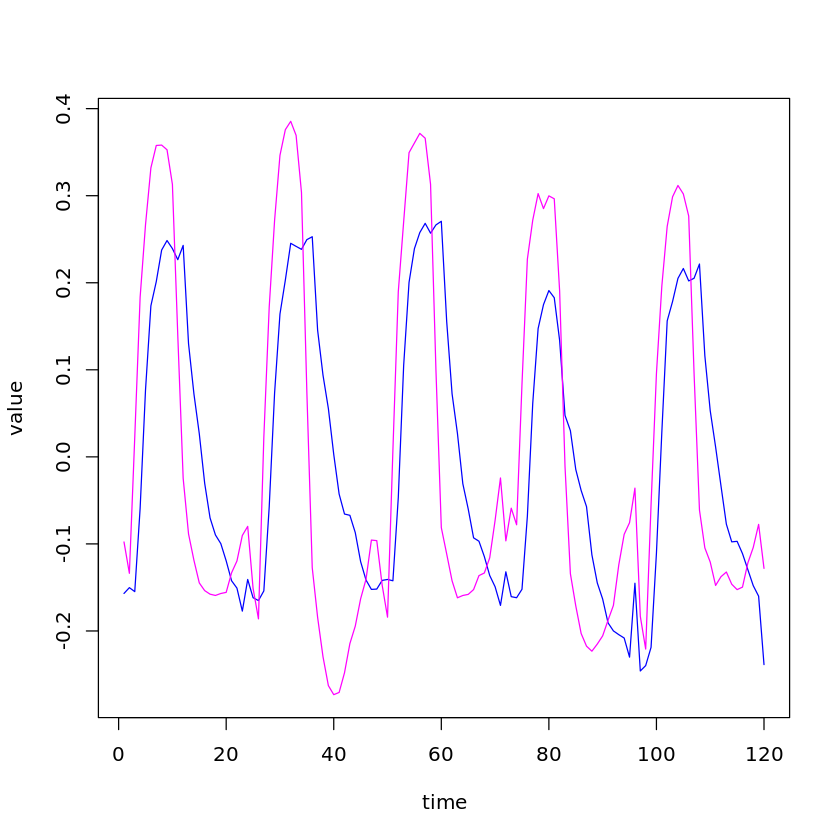

In [149]:
a <- (as.numeric(df_3[1,-1]) - mean(as.numeric(df_3[1, -1]))) / max(as.numeric(df_3[1,-1]))
b <- (as.numeric(df_3[2,-1]) - mean(as.numeric(df_3[2, -1]))) / max(as.numeric(df_3[2,-1]))
T <- dim(df_3)[2] -1 
yrange <- range(c(a,b))
plot(range(1:T), yrange, type="n", xlab="time",
     ylab="value") 
lines(a, col='blue', type='l')
lines(b, col='magenta', type='l')

png 
  2

png 
  2

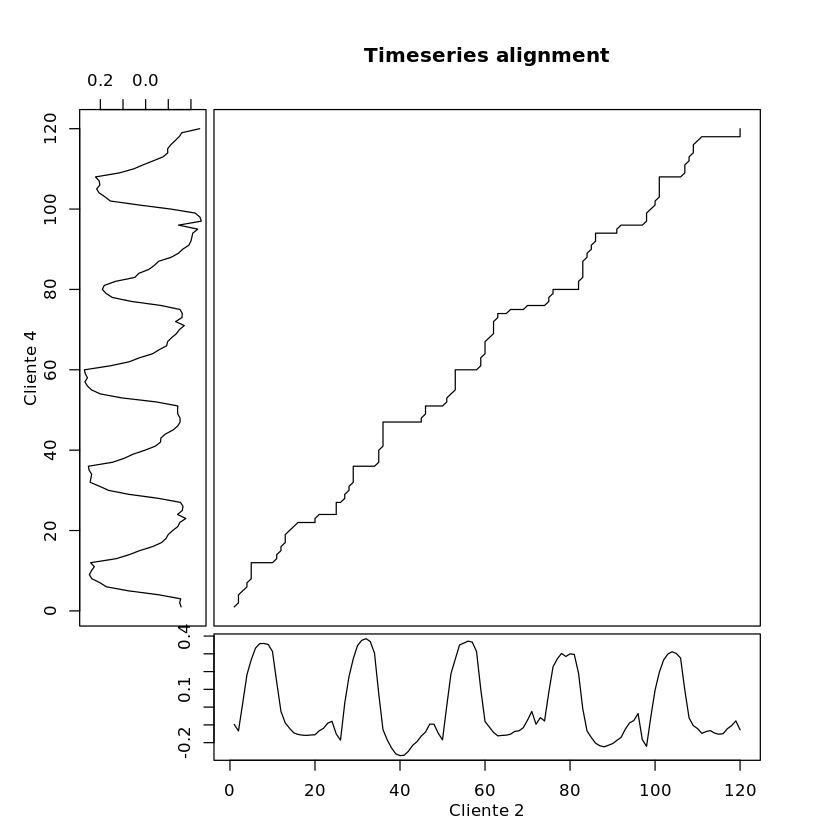

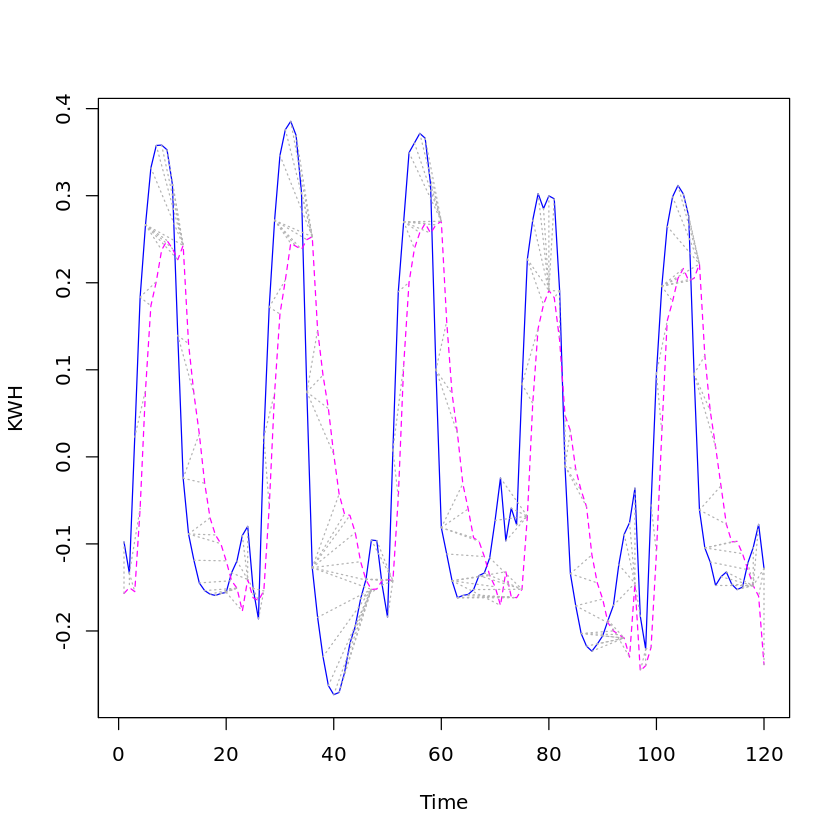

In [150]:
#TESTING
library("dtw")
pdf(file="imagen2.pdf")
plot(dtw(b,a, keep=TRUE), xlab="Cliente 2", ylab="Cliente 4", type="threeway")
dev.off()
plot(dtw(b,a, keep=TRUE), xlab="Cliente 2", ylab="Cliente 4", type="threeway")
pdf(file="imagen3.pdf")
plot(dtw(b,a, keep=TRUE), type="twoway", col=c('blue', 'magenta'), xlab= "Time", ylab = "KWH", )
dev.off()
plot(dtw(b,a, keep=TRUE), type="twoway", col=c('blue', 'magenta'), xlab= "Time", ylab = "KWH", )

## Clustering Auxiliary Functions
The centroid parameter as `shape` guarantees that the distance between time series is computed with a cross-correlation measure. This enables the algorithm to group time series based on their shape rather than on the magnitude of consumption, which is the desired outcome. 

We use the `dtw` distance that its donde with`dtw::dtw()` and k-means algorithm 

In [151]:
library(dtwclust)
# Computes clustering of "pk" clusters using shape clustering algorithm. 
# "pk" may be an array of integers. (e.g. 3:5)
computeShapeClusters <- function(data, pk){
    tsClusterObj<-tsclust(data[,-1], type="partitional", k=pk, 
                        distance="dtw_basic", centroid="shape")
    return(tsClusterObj)
}

# Plots ts's by cluster of the clusters stored at "clustIndex" within "tsClusterObj".
plotClust <- function(tsClusterObj, clustIndex = 1){
    nClusters <- try(length(tsClusterObj), TRUE)
    if(nClusters==1){
        plot(tsClusterObj, type = "sc")
    } else {
        plot(tsClusterObj[[clustIndex]], type = "sc")
    }
}

# plots de centroid or prototype of each cluster stored at "clustIndex" within "tsClusterObj".
plotCentroids <- function(tsClusterObj, clustIndex = 1){
    nClusters <- try(length(tsClusterObj), TRUE)
    if(nClusters==1){
        k = tsClusterObj@k
        plot(tsClusterObj, type='centroids', clus=1:k)
    } else {
        k = tsClusterObj[[clustIndex]]@k
        plot(tsClusterObj[[clustIndex]], type='centroids', clus=1:k)
    }
}

# Returns centroids by cluster of the clusters stored at "clustIndex" within "tsClusterObj".
showPrototypes <- function(tsClusterObj, clustIndex = 1){
    nClusters <- try(length(tsClusterObj), TRUE)
    if(nClusters==1){
        centroids<-tsClusterObj@centroids
    } else {
        centroids<-tsClusterObj[[clustIndex]]@centroids
    }
    print(centroids)
    return(centroids)
}

# Returns validation indexes stated as "indexes" of all clusterizations 
# stored at "tsClusterObj" 
computeIndexes <- function(tsClusterObj, indexes = "valid"){
    indexTable <- 0
    nClust <- try(length(tsClusterObj), TRUE)
    if(nClust == 1){
        indexTable <- data.frame(round(cvi(tsClusterObj),4))
    }
    else {
        for(i in 1:(nClust)){
            j<-i+1
            if(i==1){
                indexTable <- data.frame(round(cvi(tsClusterObj[[i]]),4))
                colnames(indexTable) <- c("2 clusters")
            } else{
                d_aux <- round(data.frame(cvi(tsClusterObj[[i]])),4)
                colnames(d_aux) <- c(paste(j,"clusters"))
                indexTable <- cbind(indexTable,d_aux)
            }
        }
    }
    print(indexTable)
    return(indexTable)
}

# Retorna vector con # clusters scogidos por cada indice
bestClusters <- function(indexes){
    votes <- which.max(indexes[1,])+1
    votes <- c(votes, which.max(indexes[3,])+1)
    votes <- c(votes, which.min(indexes[4,])+1)
    votes <- c(votes, which.min(indexes[5,])+1)
    votes <- c(votes, which.max(indexes[6,])+1)
    votes <- c(votes, which.min(indexes[7,])+1)
    print(votes)
    t<-table(votes, votes)
    best<-colnames(t)[which.max(diag(t))]
    print(paste("Best is with", best, "clusters"))
    return(strtoi(best)-1)
}

In [ ]:
# Con fines de semana


In [169]:
clusters.20 <- computeShapeClusters(data = df_3, pk = 3)

In [170]:
table_index <- computeIndexes(clusters.20)

       round.cvi.tsClusterObj...4.
Sil                         0.3098
SF                          0.0000
CH                        458.7289
DB                          1.1339
DBstar                      1.2426
D                           0.1183
COP                         0.3240


Se encuentran los diferentes clusters para los datos con diferencia entre los días. 

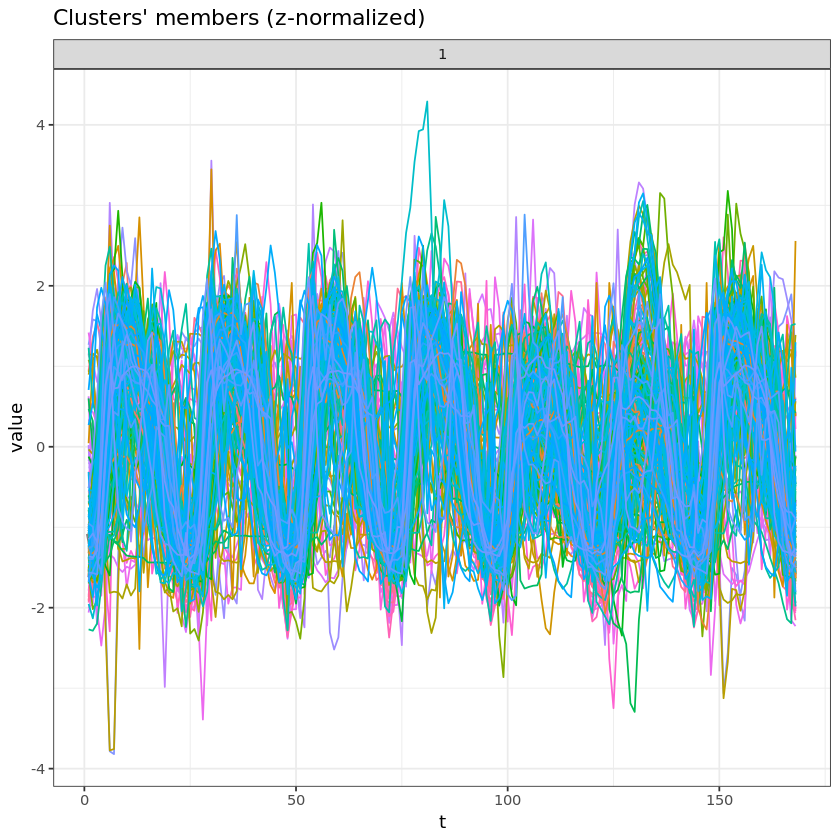

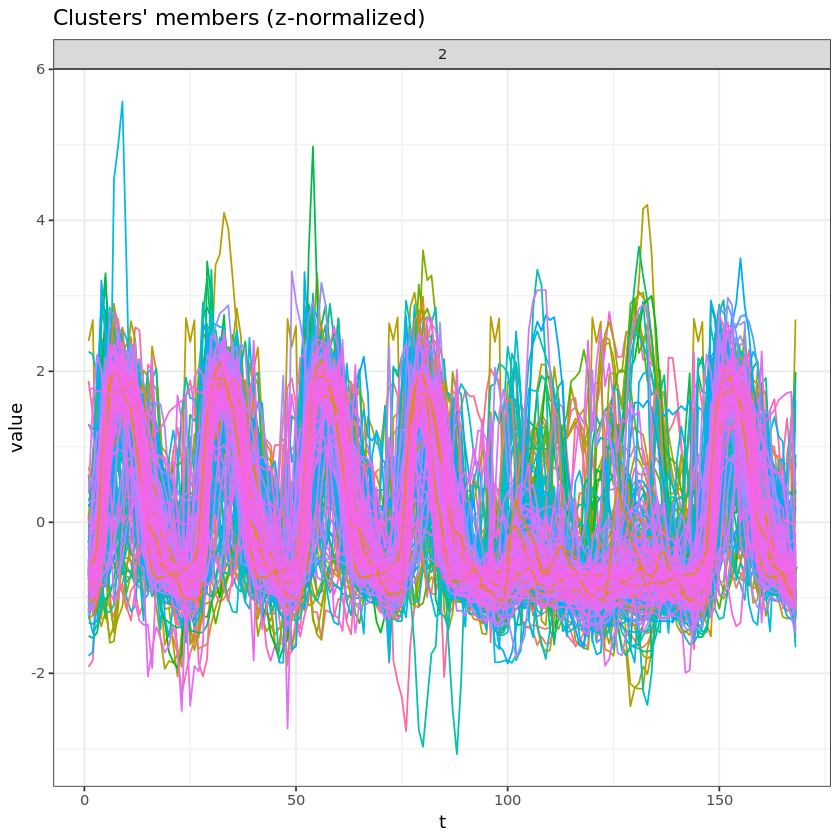

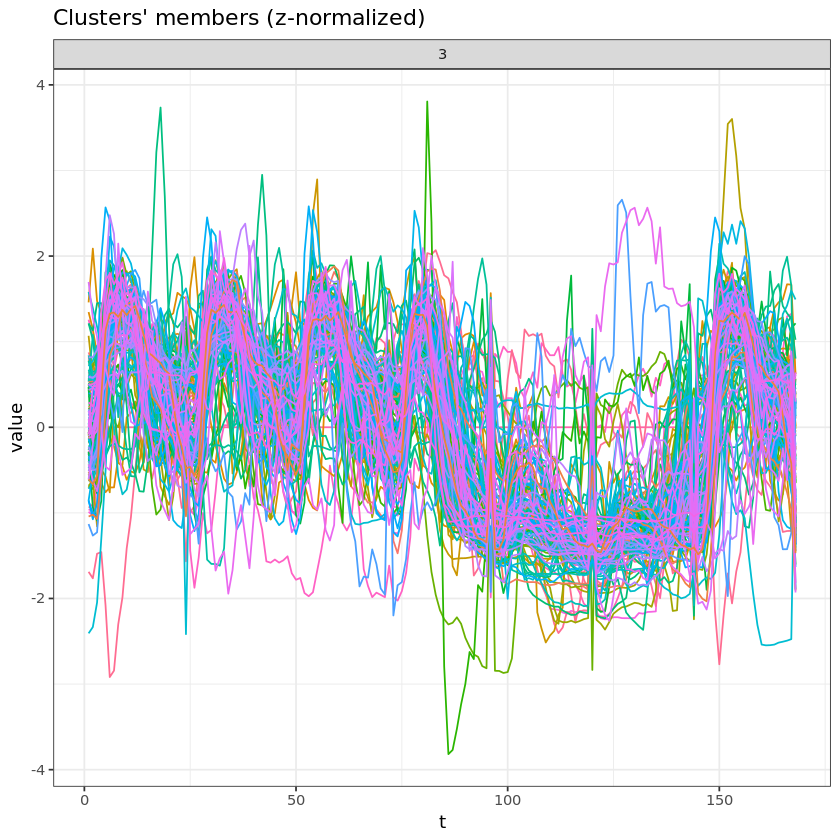

In [171]:
plot(clusters.20,type = "sc", clus = 1)
plot(clusters.20,type = "sc", clus = 2)
plot(clusters.20,type = "sc", clus = 3)

In [ ]:
clusters.20[1]

[[1]]
partitional clustering with 3 clusters
Using dtw distance
Using shape centroids
Using zscore preprocessing

Time required for analysis:
    user   system  elapsed 
1305.173   10.307 1402.982 

Cluster sizes with average intra-cluster distance:

  size  av_dist
1  586 36.91194
2  254 56.71738
3  134 46.76606


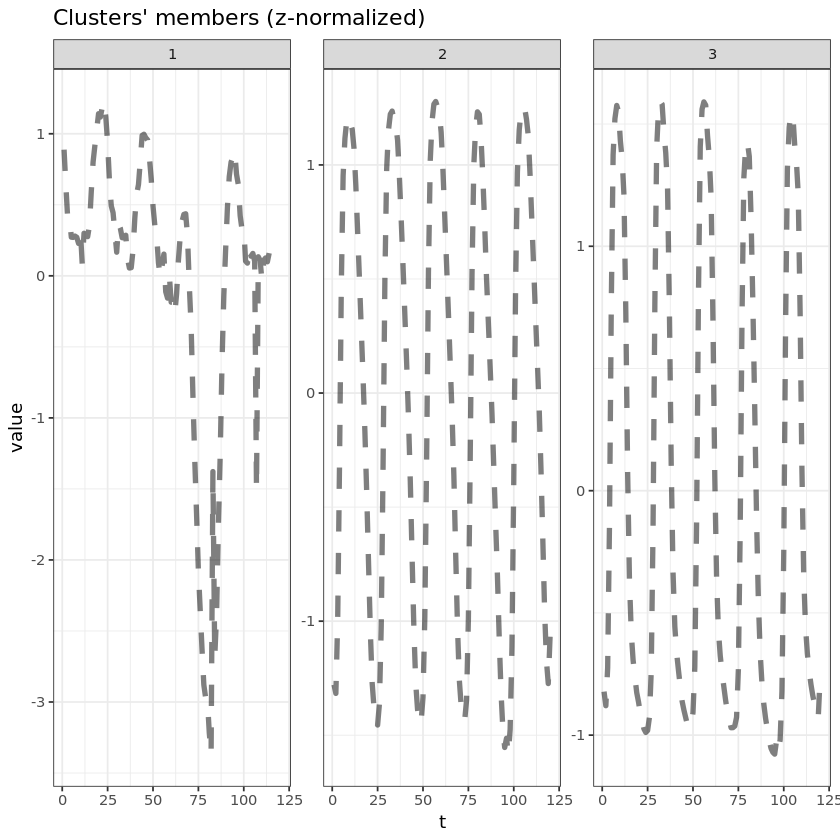

In [ ]:
plot(clusters.20[[2]], type='centroids')

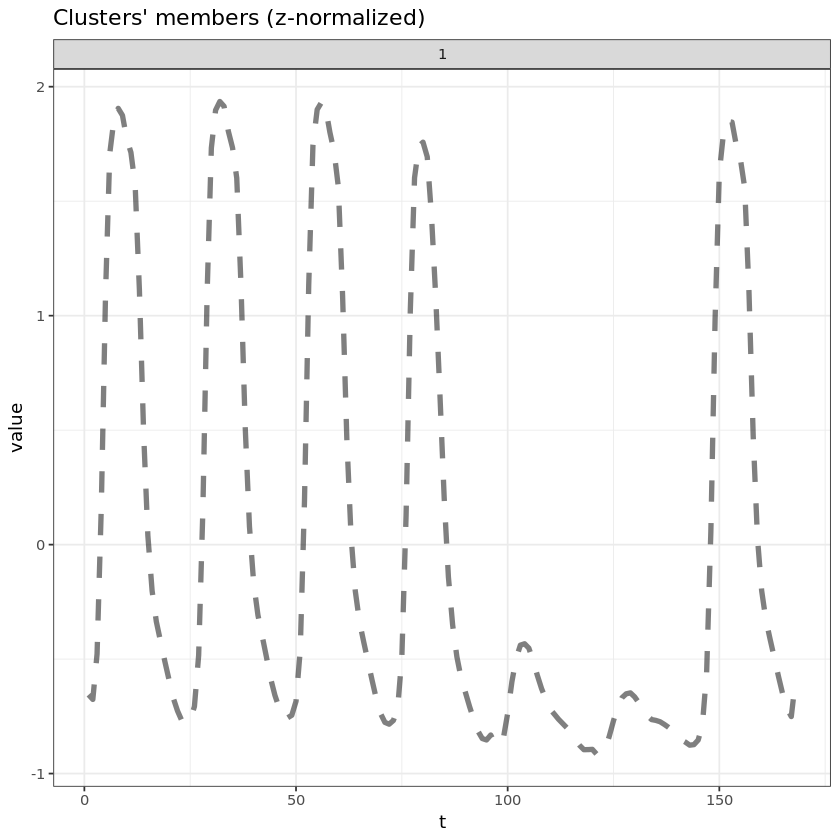

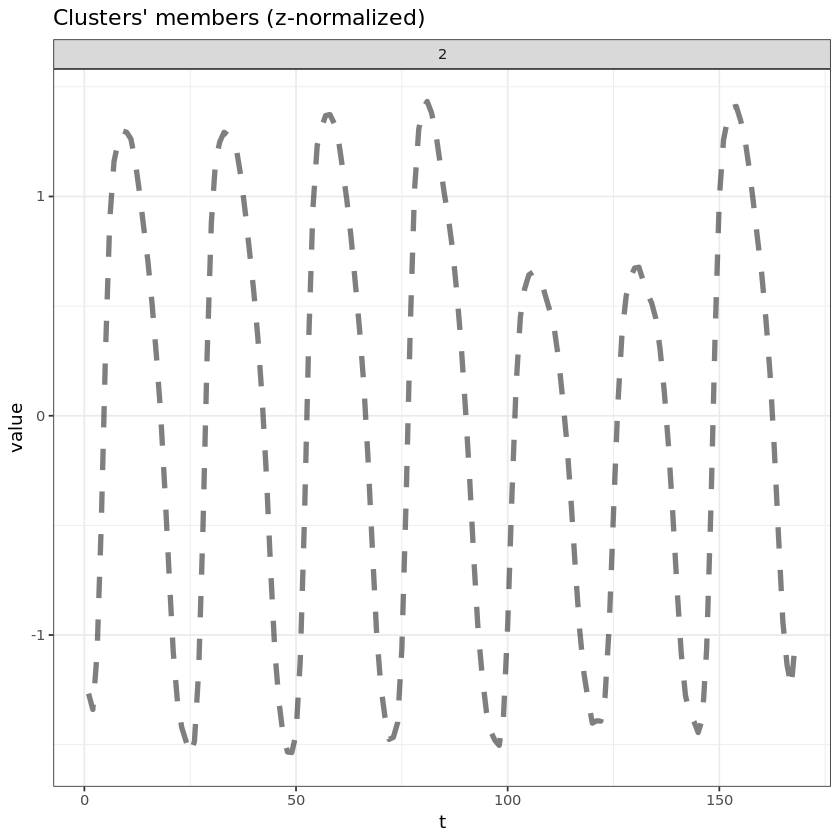

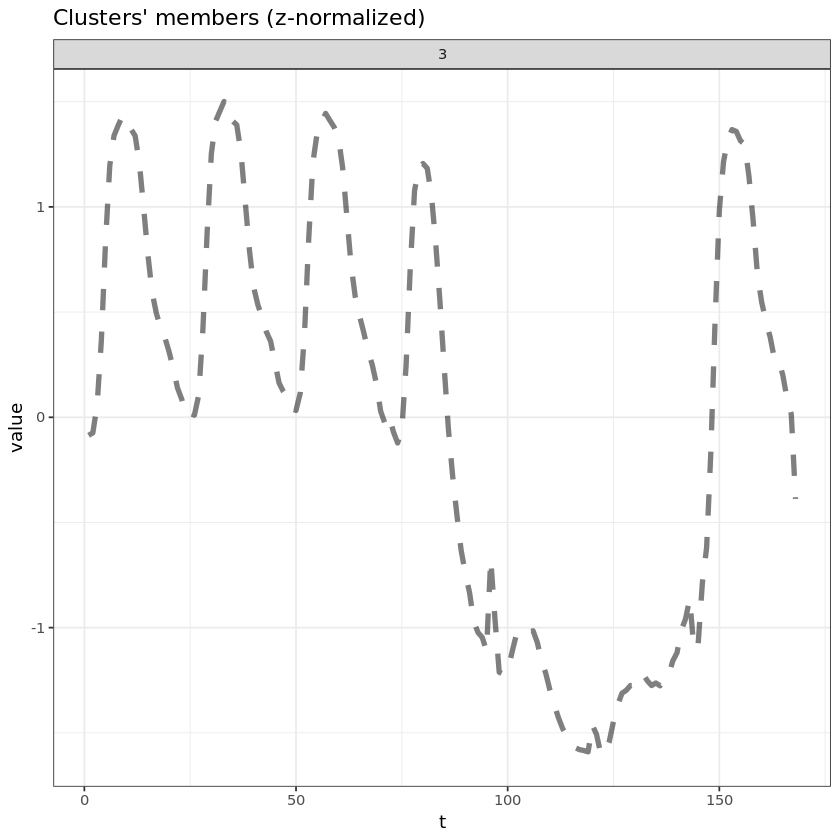

In [ ]:
plot(clusters.20[[1]], type='centroids', clus=1)
plot(clusters.20[[1]], type='centroids', clus=2)
plot(clusters.20[[1]], type='centroids', clus=3)

In [ ]:
missing <- data[rowSums(is.na(data)) > 0L, ]
na_count <-sapply(missing, function(y) sum(length(which(is.na(y)))))
na_count <- data.frame(na_count)
na_count[100:200,]

[1]  72  72  72  72  72  72  72  72  72  72  83  72  72  72  82  87  72  72
 [19]  72  72  72  72  72  72  72  85  72  73  79  96  96  96  96  96  96  87
 [37]  98 120 116  72  72  72  72  72  72  72  72  72  72  72  72  70  48  48
 [55]  48  48  48  48  48  48  48  48  46  24   8   1  35   0   0   2  22   0
 [73]   2  24  24  24  24  24  26  30   2  22   0   2  22   2  23  24  22   0
 [91]   0   0   0   0   0   0   0   0   2  22   0

### Análisis sin fines de semana

#### Clustering por estaciones

In [ ]:
# Clustering con promedios por estación seguidos
clustEstaciones <- computeShapeClusters(df_2, pk = 2:5)

In [ ]:
indexesEstaciones <- computeIndexes(clustEstaciones)

       2 clusters 3 clusters 4 clusters 5 clusters
Sil        0.3104     0.1304     0.1243     0.1388
SF         0.0000     0.0000     0.0000     0.0000
CH       554.9707   325.1663   241.8549   219.1267
DB         1.3787     1.9539     1.8575     1.6115
DBstar     1.3787     2.2379     2.1963     1.8913
D          0.0768     0.0827     0.0785     0.0956
COP        0.3882     0.3583     0.3320     0.3152


In [7]:
print(xtable(t(indexesEstaciones)))

% latex table generated in R 4.0.4 by xtable 1.8-4 package
% Sun Apr 11 22:01:43 2021
\begin{table}[ht]
\centering
\begin{tabular}{rrrrrrrr}
  \hline
 & Sil & SF & CH & DB & DBstar & D & COP \\ 
  \hline
2 clusters & 0.31 & 0.00 & 554.97 & 1.38 & 1.38 & 0.08 & 0.39 \\ 
  3 clusters & 0.13 & 0.00 & 325.17 & 1.95 & 2.24 & 0.08 & 0.36 \\ 
  4 clusters & 0.12 & 0.00 & 241.85 & 1.86 & 2.20 & 0.08 & 0.33 \\ 
  5 clusters & 0.14 & 0.00 & 219.13 & 1.61 & 1.89 & 0.10 & 0.32 \\ 
   \hline
\end{tabular}
\end{table}


2 clusters 2 clusters 2 clusters 2 clusters 5 clusters 5 clusters 
         2          2          2          2          5          5 
[1] "Best is with 2 clusters"


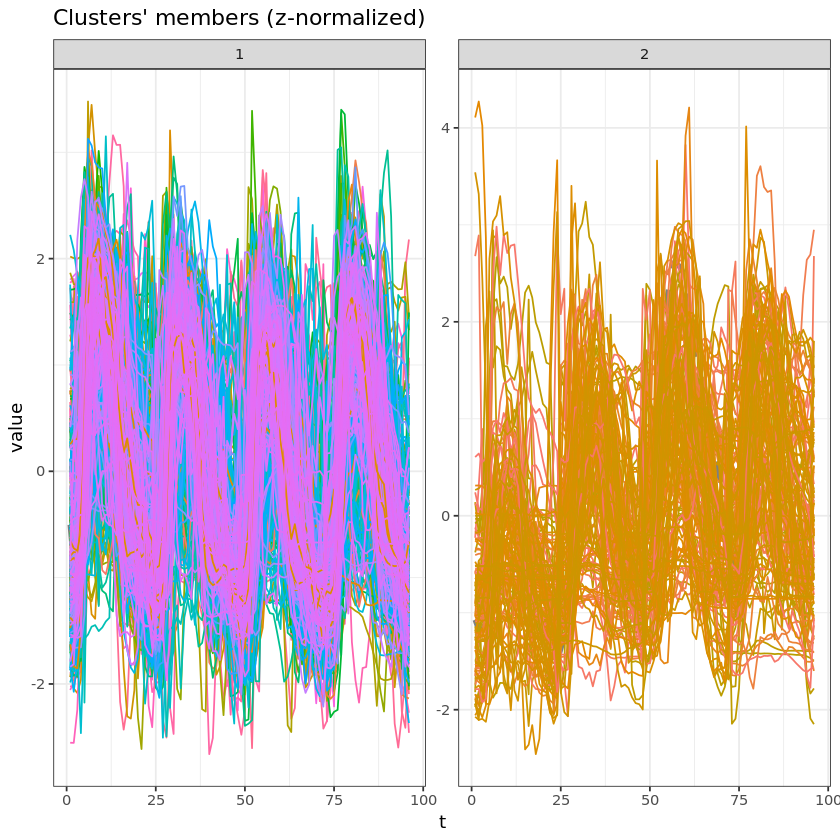

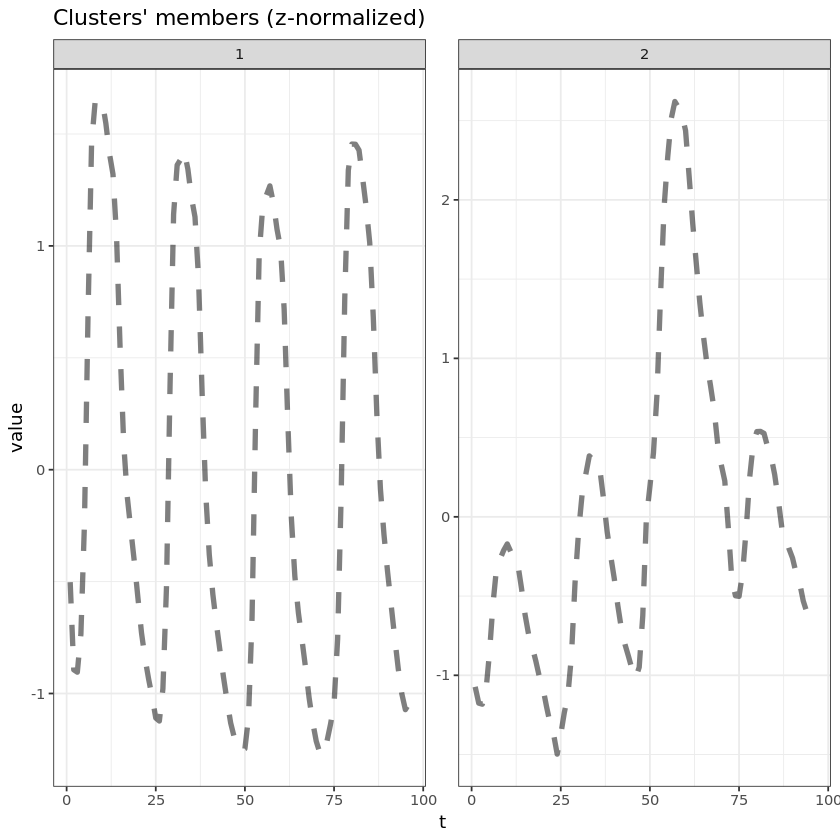

In [ ]:
tIndex <- bestClusters(indexesEstaciones)
#png("season_ts.png")
plotClust(clustEstaciones, clustIndex = tIndex)
#dev.off
#png("season_ts_average.png")
plotCentroids(clustEstaciones, clustIndex = tIndex)
#dev.off()

In [ ]:
clustEstacionesSelec <- clustEstaciones[[tIndex]]
clustEstacionesSelec

partitional clustering with 2 clusters
Using dtw_basic distance
Using shape centroids
Using zscore preprocessing

Time required for analysis:
   user  system elapsed 
117.602   4.771 130.377 

Cluster sizes with average intra-cluster distance:

  size  av_dist
1  836 32.64392
2  138 48.95865

#### Clustering grupo con consumo igual todos los semestres

In [34]:
empsConsCte <- df_1[clustEstacionesSelec@cluster==1,]
clustEmpsCte <- computeShapeClusters(empsConsCte, pk = 2:5)

In [35]:
indexesEmpsCte <- computeIndexes(clustEmpsCte)

       2 clusters 3 clusters 4 clusters 5 clusters
Sil        0.2266     0.2434     0.1616     0.1265
SF         0.0002     0.0000     0.0000     0.0000
CH       936.8531   510.1187   274.4287   196.1940
DB         1.3975     1.1529     1.7894     1.6588
DBstar     1.3975     1.6128     2.8507     2.4307
D          0.0504     0.0561     0.0354     0.0436
COP        0.2644     0.2455     0.2389     0.2113


In [37]:
library(xtable)
print(xtable(t(indexesEmpsCte)))

% latex table generated in R 4.0.4 by xtable 1.8-4 package
% Sun Apr 11 22:08:59 2021
\begin{table}[ht]
\centering
\begin{tabular}{rrrrrrrr}
  \hline
 & Sil & SF & CH & DB & DBstar & D & COP \\ 
  \hline
2 clusters & 0.23 & 0.00 & 936.85 & 1.40 & 1.40 & 0.05 & 0.26 \\ 
  3 clusters & 0.24 & 0.00 & 510.12 & 1.15 & 1.61 & 0.06 & 0.25 \\ 
  4 clusters & 0.16 & 0.00 & 274.43 & 1.79 & 2.85 & 0.04 & 0.24 \\ 
  5 clusters & 0.13 & 0.00 & 196.19 & 1.66 & 2.43 & 0.04 & 0.21 \\ 
   \hline
\end{tabular}
\end{table}


3 clusters 2 clusters 3 clusters 2 clusters 3 clusters 5 clusters 
         3          2          3          2          3          5 
[1] "Best is with 3 clusters"


png 
  2

png 
  2

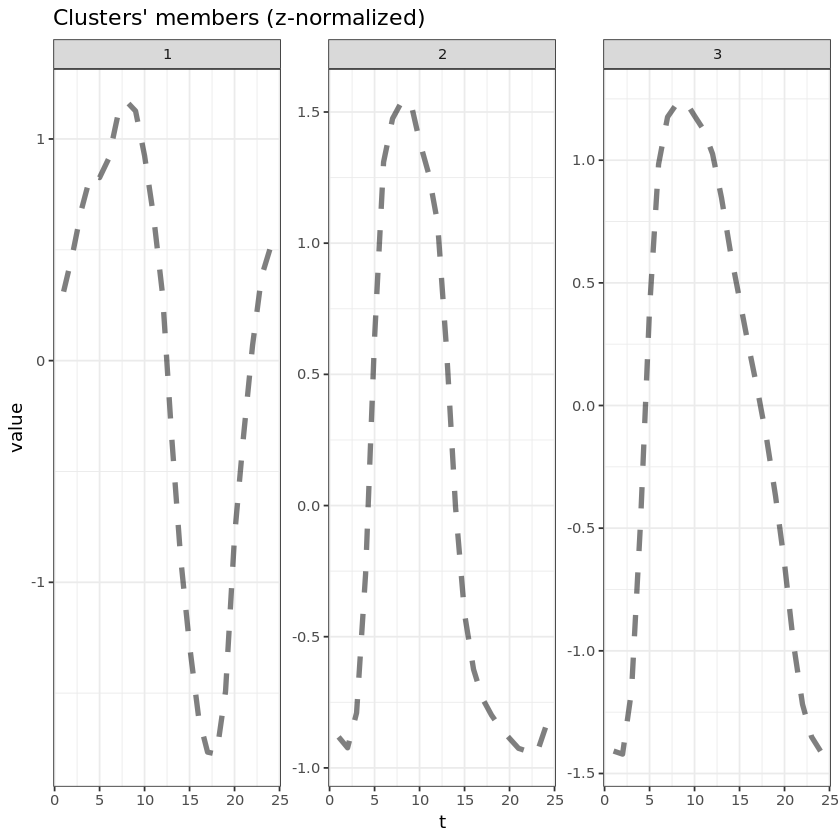

In [67]:
index = bestClusters(indexesEmpsCte)
#index =2
pdf("3clusts_const.pdf")
plotClust(clustEmpsCte, clustIndex = index)
dev.off()
#Prototipos 
pdf("3clusts_const_prototipos.pdf")
plotCentroids(clustEmpsCte, clustIndex = index)
dev.off()
plotCentroids(clustEmpsCte, clustIndex = index)

¿Cuales son las horas picos de estos dos tipos de clientes?


In [59]:
colMax <- function(data) sapply(data, max, na.rm = TRUE)
colSort <- function(data, ...) sapply(data, sort, ...)

In [66]:
df_constante_prototipos  <-as.data.frame(clustEmpsCte[[2]]@centroids)
colnames(df_constante_prototipos) <- c("Grupo Clientes 1", "Grupo Clientes 2", "Grupo Clientes 3")
rownames(df_constante_prototipos) <- paste(0:23 ,"h")
df_constante_prototipos 

colMax(df_constante_prototipos )




Grupo Clientes 1 Grupo Clientes 2 Grupo Clientes 3
0 h   0.31118273      -0.881947786     -1.40854810     
1 h   0.48163602      -0.923339938     -1.42107024     
2 h   0.68355844      -0.790170416     -1.16113960     
3 h   0.83702069      -0.261420789     -0.47318994     
4 h   0.82574243       0.639371896      0.39577296     
5 h   0.91050150       1.308953894      0.98330342     
6 h   1.10118425       1.474975198      1.17611103     
7 h   1.16896907       1.538436850      1.22911804     
8 h   1.12596921       1.540016284      1.23927295     
9 h   0.92451623       1.387985707      1.18066828     
10 h  0.65114901       1.265911992      1.12400956     
11 h  0.29740231       1.078275916      1.02575833     
12 h -0.33691242       0.594408164      0.84575957     
13 h -0.88624166      -0.007233568      0.62357515     
14 h -1.28520706      -0.413084803      0.43303701     
15 h -1.60671881      -0.624519371      0.24237882     
16 h -1.76598913      -0.735982689      0.06221549     
17 h -1.77505359      -0.799055314     -0.13337095     
18 h -1.49116806      -0.848297503     -0.36918543     
19 h -0.79186759      -0.887617908     -0.64519996     
20 h -0.33948031      -0.925494490     -0.97183029     
21 h  0.06850081      -0.936713261     -1.21823736     
22 h  0.37917474      -0.947471257     -1.35028846     
23 h  0.51213119      -0.845986807     -1.40892029

Grupo Clientes 1 Grupo Clientes 2 Grupo Clientes 3 
        1.168969         1.540016         1.239273

ERROR: Error in match.fun(FUN): '1' is not a function, character or symbol


#### Sub-Clustering grupo 1: Empresas con consumo elevado en el Q3 del año.  

In [32]:
library(dtwclust)

dtwclust:
Setting random number generator to L'Ecuyer-CMRG (see RNGkind()).
To read the included vignettes type: browseVignettes("dtwclust").
See news(package = "dtwclust") after package updates.



In [40]:
empsConsQ1 <- df_2[clustEstacionesSelec@cluster==2, -c(2:49, 74:97)]
clustEmpsQ1 <- computeShapeClusters(empsConsCte, pk = 2:5)

Warning message in tsclust(data[, -1], type = "partitional", k = pk, distance = "dtw_basic", :
“At least one clustering did not converge within the allowed iterations.”


In [41]:
indexesEmpsQ1 <- computeIndexes(clustEmpsQ1)

       2 clusters 3 clusters 4 clusters 5 clusters
Sil        0.2255     0.1683     0.1919     0.1352
SF         0.0001     0.0000     0.0000     0.0000
CH       739.2802   367.2811   260.0039   198.7355
DB         1.3946     1.5800     1.5005     1.6295
DBstar     1.3946     1.7471     2.0011     2.3607
D          0.0504     0.0369     0.0635     0.0445
COP        0.2643     0.2490     0.2327     0.2240


In [42]:
library(xtable)
print(xtable(t(indexesEmpsQ1)))

% latex table generated in R 4.0.4 by xtable 1.8-4 package
% Sun Apr 11 22:10:29 2021
\begin{table}[ht]
\centering
\begin{tabular}{rrrrrrrr}
  \hline
 & Sil & SF & CH & DB & DBstar & D & COP \\ 
  \hline
2 clusters & 0.23 & 0.00 & 739.28 & 1.39 & 1.39 & 0.05 & 0.26 \\ 
  3 clusters & 0.17 & 0.00 & 367.28 & 1.58 & 1.75 & 0.04 & 0.25 \\ 
  4 clusters & 0.19 & 0.00 & 260.00 & 1.50 & 2.00 & 0.06 & 0.23 \\ 
  5 clusters & 0.14 & 0.00 & 198.74 & 1.63 & 2.36 & 0.04 & 0.22 \\ 
   \hline
\end{tabular}
\end{table}


2 clusters 2 clusters 2 clusters 2 clusters 4 clusters 5 clusters 
         2          2          2          2          4          5 
[1] "Best is with 2 clusters"


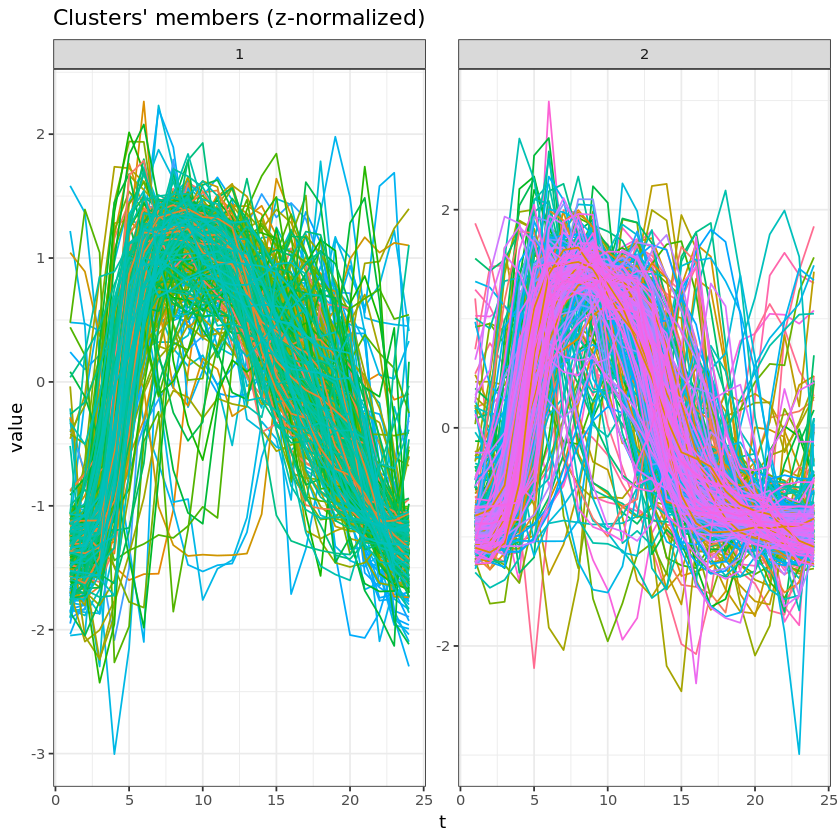

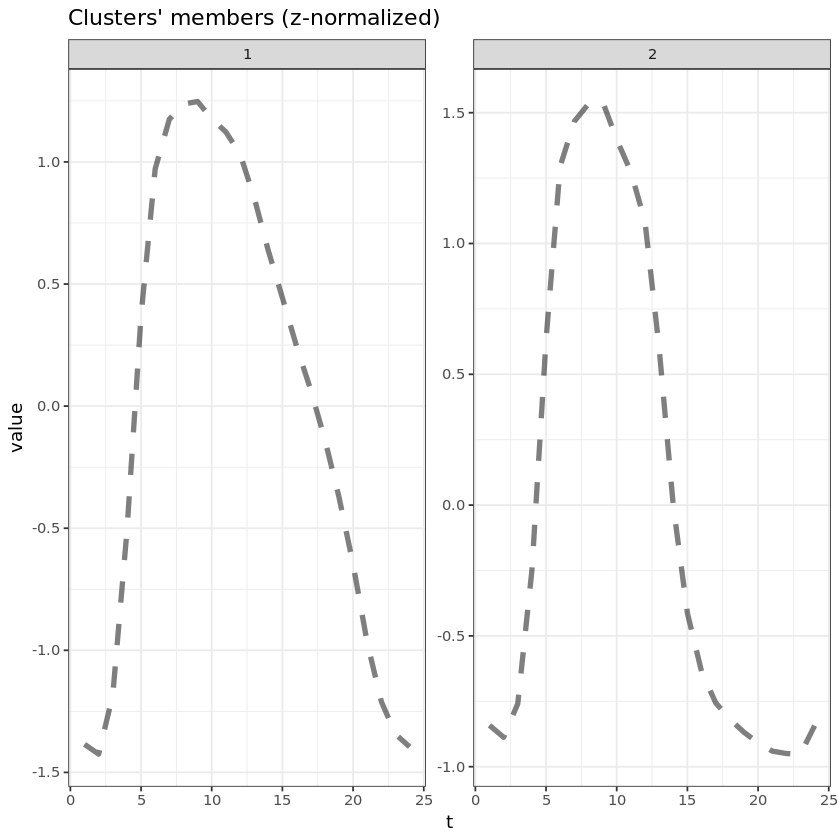

In [43]:
index = bestClusters(indexesEmpsQ1)

plotClust(clustEmpsQ1, clustIndex = index)
plotCentroids(clustEmpsQ1, clustIndex = index)

In [110]:
df_seasonal <- as.data.frame(clustEmpsQ1[[1]]@centroids)
colnames(df_seasonal) <- c("Grupo Clientes 1", "Grupo Clientes 2")
rownames(df_seasonal) <- paste(0:23 ,"h")
df_seasonal

Grupo Clientes 1 Grupo Clientes 2
0 h  -1.38495708      -0.841791086    
1 h  -1.42514502      -0.887485528    
2 h  -1.18289057      -0.759136526    
3 h  -0.51355817      -0.250238531    
4 h   0.36980769       0.629669777    
5 h   0.97144470       1.294980975    
6 h   1.17464047       1.466554034    
7 h   1.23695873       1.533462502    
8 h   1.24743271       1.542752816    
9 h   1.17673763       1.397775490    
10 h  1.12262648       1.273970714    
11 h  1.03298791       1.083764384    
12 h  0.85463937       0.600858866    
13 h  0.63710035      -0.001409362    
14 h  0.44374761      -0.412764703    
15 h  0.24514065      -0.635694418    
16 h  0.06655508      -0.755541649    
17 h -0.13576878      -0.818000527    
18 h -0.37203410      -0.868188129    
19 h -0.64731179      -0.908650431    
20 h -0.96897841      -0.940360670    
21 h -1.21022352      -0.949604423    
22 h -1.34363962      -0.951825784    
23 h -1.39531229      -0.843097791

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=68673a56-d449-4dea-9026-6542257db4bd' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>